# Train, Test and Save a Network

Notebook to generate and test a network based on specified learning parameters. This notebook uses data that was previously saved in `1 - Generate Data.ipynb`.

In [1]:
import sys
sys.path.append('../src')
import os
from classifier import Classifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from utils.mnist_reader import load_train_test_dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load the previously generated and saved data

If this data does not exist, you need to run `1. Generate Data.ipynb`.

In [2]:
data_saved_dir = '../datasets/old/split_mnist_784_50_12'

x_train, y_train, x_test, y_test, data_params = load_train_test_dataset(data_saved_dir)

print('Test data loaded. Total of {} test examples.'.format(y_test.shape[0]))
data_params

Loading dataset from directory ../datasets/split_mnist_784_50_12. Current directory is /Users/katy/Code/neurogen_classifier/examples.
Test data loaded. Total of 120 test examples.


{'dataset': 'mnist_784',
 'trains_per_class': 50,
 'tests_per_class': 12,
 'trains_in_test_set': False,
 'training_labels': None,
 'testing_labels': None,
 'precision_required': 7,
 'shuffle': False,
 'use_edge_detection': False}

## Train and test the network

Generate a network and train and test it. 
There is the option to save the network and the recall results after this step. This will enable plots to be generated using `3 - Plot Saved Network`.

In [3]:
learning_params = {'learning_pool_size': 250,
                   'f_h_sparsity': 0.2,
                   'h_threshold_mean': 24,
                   'h_threshold_sd': 3.5,
                   'h_weights_init': 1.0,
                   'h_weights_p': 0.4,
                   'h_weights_d': 0.4,
                   'novelty_threshold': 25,
                   # This will be mult by the threshold to get the pre_synaptic weight total.
                   # ratio * threshold indicates the maximum voltage of a hidden neuron.
                   'noise_tolerance_ratio': 1.3,
                   'p_init': 0.5,
                   'p_potentiate': 0.2,
                   'p_deprecate': 0.02,
                   'p_mature_threshold': 1.0,
                   }
classifier = Classifier(learning_params, verbose=False)
labels_learnt = classifier.learn(x_train, y_train)
all_results = classifier.predict(x_test, y_test)

Classifier network defined as follows:

Learning params summary: 
{   'f_h_sparsity': 0.2,
    'h_threshold_mean': 24,
    'h_threshold_sd': 3.5,
    'h_weights_d': 0.4,
    'h_weights_init': 1.0,
    'h_weights_p': 0.4,
    'learning_pool_size': 250,
    'noise_tolerance_ratio': 1.3,
    'novelty_threshold': 25,
    'p_deprecate': 0.02,
    'p_init': 0.5,
    'p_mature_threshold': 1.0,
    'p_potentiate': 0.2}
Learning:
      Length of each signal:      784
      Number of training signals: 500


Initialised subnetwork classification 0 for learning. Thresholds range from min 14.95075824540548 to maximum 33.414139260271476

 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49

Initialised subnetwork classification 1 for learning. Thresholds range from min 14.056142378628829 to maximum 32.8554531778335

 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 

## Print the core results with a confusion matrix

In [4]:
predictions = all_results['predictions']
results = classification_report(y_true=y_test, y_pred=predictions, zero_division=0, output_dict=True)
results_dict = {'accuracy': results['accuracy'],
                'f1_score_macro': results['macro avg']['f1-score'],
                'f1_score_weighted': results['weighted avg']['f1-score'],
                'precision_weighted': results['weighted avg']['precision'],
                'recall_weighted': results['weighted avg']['recall'],
                }

In [5]:
print('Learning step data')
print('labels learnt: {}'.format(labels_learnt))
print(classifier.subnet_data())
print(classification_report(y_true=y_test, y_pred=predictions, zero_division=0, output_dict=True))
print('\nRecall for simulation: Overall accuracy: {} Precision: {},  Recall: {}'
      .format(results_dict['accuracy'],
              results_dict['precision_weighted'],
              results_dict['recall_weighted']))

Learning step data
labels learnt: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
  classification  h_permanent  h_refreshed  h_insufficient_conns  \
0              0          164          235                   310   
1              1            3          250                   233   
2              2          184          244                     1   
3              3           97          218                    99   
4              4          181          194                    79   
5              5          146          202                   127   
6              6          230          249                    44   
7              7           48          224                    23   
8              8          309          309                     8   
9              9          143          288                    23   

   training samples  training samples contrib  training samples not novel  \
0                50                        46                           4   
1                50  

In [6]:
average_scores, average_spikes = classifier.get_predict_diagnostics(all_results)


Establishing averages
... done establishing averages


In [7]:
average_scores

,0,1,2,3,4,5,6,7,8,9,actual
0,26.65,0.48,2.07,3.55,3.95,8.88,6.44,2.91,4.45,6.58,0
1,0.00,0.86,0.18,0.04,0.00,0.24,0.06,0.00,0.28,0.00,1
2,1.60,0.21,11.89,0.47,1.75,0.38,1.91,1.15,3.81,2.57,2
3,3.94,0.86,0.43,11.66,0.16,4.30,0.32,0.17,4.89,1.07,3
4,0.12,0.11,0.39,0.31,6.46,0.42,0.46,1.08,0.37,2.88,4
5,3.76,0.37,0.43,4.88,0.70,14.41,0.44,0.69,8.18,3.87,5
6,1.17,0.00,1.05,0.20,1.03,0.57,10.28,0.36,1.21,0.80,6
7,0.52,0.31,0.28,0.47,2.24,0.93,0.33,3.76,0.59,4.92,7
8,0.60,0.20,1.43,4.46,0.67,3.51,1.70,0.73,8.24,2.44,8
9,0.48,0.22,0.10,0.57,4.67,1.29,0.12,4.17,0.78,8.34,9


In [8]:
average_spikes

31

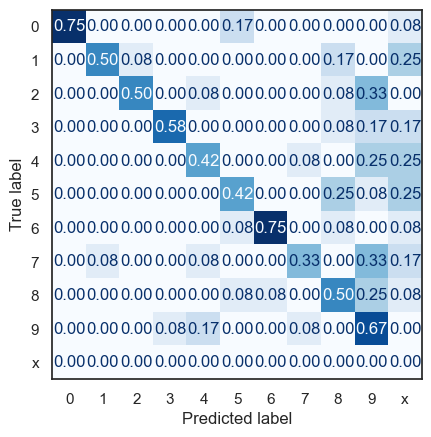

In [9]:

sns.set(font_scale = 1)
with sns.axes_style('white'):
    ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predictions,
                                        labels=np.append(np.sort(labels_learnt), 'x'),
                                        normalize='true', values_format = '.2f', colorbar=False,
                                        cmap=plt.cm.Blues)
    
plt.show()
plt.close()

## Optional: Save the network

If you would like to plot the results or perform a new recall, save this network.

The network (with its saved recall results) can be re-established with the following code.

```
from classifier import Classifier

classifier, labels_learnt = Classifier.from_saved(networks_dir+os.sep+network_name, verbose=False)
all_results = classifier.get_last_predict_results()
```

In [13]:
from utils.excel_handler import get_timestamp_str 
# Directory for loading and/or saving the network
networks_dir = '../simulation_results/paper_results/pre_trained_network_examples'
network_name = 'my_saved_network_'+get_timestamp_str()
classifier.save_network(networks_dir, network_name)

****** FUll file path for excel  ../simulation_results/paper_results/pre_trained_network_examples/my_saved_network_2025-02-12-13-40/network_description.xlsx
Network description saved to directory ../simulation_results/paper_results/pre_trained_network_examples/my_saved_network_2025-02-12-13-40


'../simulation_results/paper_results/pre_trained_network_examples/my_saved_network_2025-02-12-13-40'

## Plot details of the network

The notebook `3 - Plot Saved Network.ipynb` can be used to plot the network that you have just saved.